# Welcome to the Data Analysis Section
In this exercise, we will upload the accelerometer data to the python environment, import the data,transform it to a workable format, and finally analyze it.

## Upload the Data
To upload the data, you should press the "Files" icon on the left and drag the .txt file to the blank area. Or, you can click on "Upload to session storage" after you have clicked on the "Files" icon.

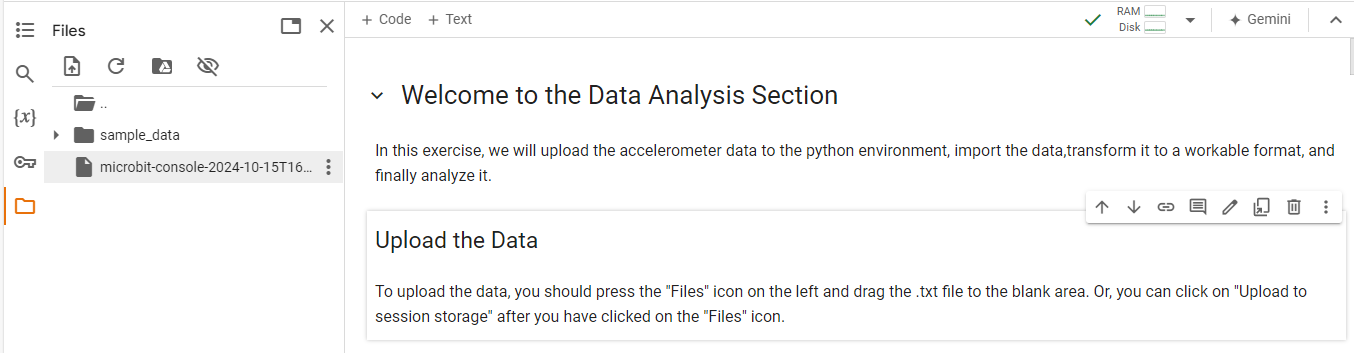

Above image is how a succesful upload looks like.

## Import the Data

In [48]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Open the text file and read the contents
with open('microbit-console-2024-10-15T20-25-42-764Z.txt', 'r') as txt_file: ## ---> You will replace the name of the uploaded file with the current one inside the function (Hint: Copy and paste the name of your .txt file on the current one)
    lines = txt_file.readlines()

# Initialize lists to hold x, y, z values
x_values = []
y_values = []
z_values = []

# Function to clean up and extract only the numeric value from a string
def extract_numeric_value(line):
    try:
        # Split on ':' and extract only the number, ignoring any extra characters
        return line.split(':')[1].split()[0]
    except IndexError:
        # Return None if the line is malformed
        return None

# Process each line in the text file
for line in lines:
    line = line.strip()
    if line.startswith('x:'):
        value = extract_numeric_value(line)
        if value is not None:
            x_values.append(value)
    elif line.startswith('y:'):
        value = extract_numeric_value(line)
        if value is not None:
            y_values.append(value)
    elif line.startswith('z:'):
        value = extract_numeric_value(line)
        if value is not None:
            z_values.append(value)

# Ensure all lists have the same length (if not, pad with None or remove excess)
min_length = min(len(x_values), len(y_values), len(z_values))
x_values = x_values[:min_length]
y_values = y_values[:min_length]
z_values = z_values[:min_length]

# Create a CSV file and write the x, y, z values
with open('output.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['x', 'y', 'z'])  # Write the header
    for x, y, z in zip(x_values, y_values, z_values):
        writer.writerow([x, y, z])  # Write each row


## Transform the Data
Now that we have a dataset with the .csv format, let's explore it with python. Python helps us analyze the tabular data(it can be .csv,.sql,.xlsx etc.) with the help of library called "pandas". Refresh and check the "Files" area on the left. Have you seen the "output.csv"? We will transform it to a pandas dataframe with one line of code and display it below.

In [49]:
import pandas as pd

df= pd.read_csv('output.csv')
df.head() #This command shows the first 5 lines of the table.

,x,y,z
0,-104,1096,416
1,-104,1096,416
2,1304,1096,416
3,1304,1096,416
4,1304,1096,416


Let's get some information of our data with a useful command

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       3164 non-null   int64
 1   y       3164 non-null   int64
 2   z       3164 non-null   int64
dtypes: int64(3)
memory usage: 74.3 KB


From the above output you can observe the name of the columns, how many data points you have for the each column and their data types.

## !Optional!
Remove the "#"s and execute the two cells below if you have "object" type instead of "int64" on the Dtype information above.
If any of the datatype is set to "object" which is a data type that is not analizable for the numeric values, we will first need to do a "data cleansing" just below, and change that datatypes. **If not, continue to the Visualize the Data Section**

In [46]:
#df['x'] = df['x'].str.replace(r'\D+', '', regex=True).replace('', '0').astype(int)
#df['y'] = df['y'].str.replace(r'\D+', '', regex=True).replace('', '0').astype(int)
#df['z'] = df['z'].str.replace(r'\D+', '', regex=True).replace('', '0').astype(int)

#df.head()

AttributeError: Can only use .str accessor with string values!

Our dataset is cleansed from non-numeric values in the cell above, so it is time to change the data type from "object" --> to "integer".

In [47]:
#df['x'] = df['x'].astype(int)
#df['y'] = df['y'].astype(int)
#df['z'] = df['z'].astype(int)
#df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3164 entries, 0 to 3163
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       3164 non-null   int64
 1   y       3164 non-null   int64
 2   z       3164 non-null   int64
dtypes: int64(3)
memory usage: 74.3 KB


Now that we have a more analizable format of a dataset, let's jump in to the visualizations and explore the data in depth.

## Visualize the Data

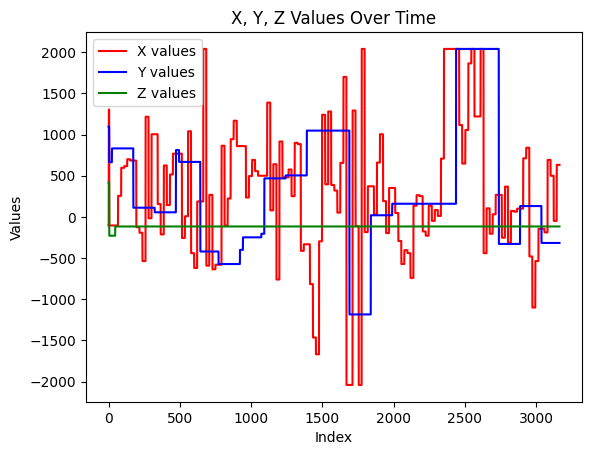

In [51]:
# Create a new figure
plt.figure()

# Plot x values against their index (red line)
plt.plot(df.index, df["x"], color='red', label='X values')

# Plot y values against their index (blue line)
plt.plot(df.index, df["y"], color='blue', label='Y values')

# Plot z values against their index (green line)
plt.plot(df.index, df["z"], color='green', label='Z values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('X, Y, Z Values Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

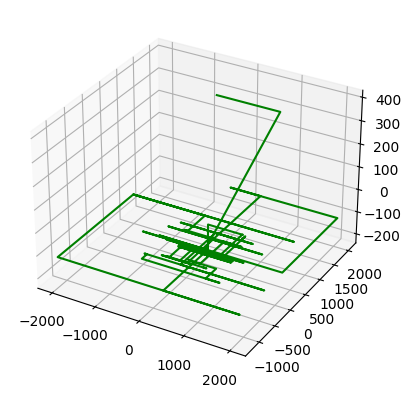

In [52]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D line
ax.plot3D(df["x"], df["y"], df["z"], 'green')

# Show the plot
plt.show()

## Tools of the Trade: Yaw, Pitch, and Roll
If you are interested in aviation, how the the aircrafts and/or spacecrafts move this topic is just for you. As our micro:bit device accelerates on the (x,y,z) dimensions, we actually gave that movements certain names.

![ChessUrl](https://i.makeagif.com/media/6-06-2016/MybXwU.gif "chess")


## Understanding Rotational Motion

When dealing with rotational motion, particularly in the context of an object moving in 3D space (such as a plane, drone, or sensor-equipped device), we describe its orientation using three angles: **yaw**, **roll**, and **pitch**. These angles represent rotations around different axes and are essential for understanding the object's orientation.


### 1. **Pitch (θ)**

Pitch is the rotation around the **x-axis** (lateral or side-to-side axis). It describes the "tilt" of an object, or how much it is angled up or down.

#### Pitch Equation:

$$\text{pitch} (\theta) = \arctan \left( \frac{y}{\sqrt{x^2 + z^2}} \right)$$

Where:
- `x`, `y`, and `z` are the accelerometer readings along the corresponding axes.
- The angle is typically measured in **degrees**.


### 2. **Roll (ϕ)**

Roll is the rotation around the **y-axis** (longitudinal axis, or the axis running from nose to tail of an aircraft). It describes how much the object is tilting to the left or right.

#### Roll Equation:

$$\text{roll} (\phi) = \arctan \left( \frac{z}{\sqrt{x^2 + y^2}} \right)$$

Where:
- `x`, `y`, and `z` are the accelerometer readings along the corresponding axes.
- The angle is typically measured in **degrees**.


### 3. **Yaw (ψ)**

Yaw is the rotation around the **z-axis** (vertical axis). It describes the "heading" or direction the object is facing.

#### Yaw Equation (with a magnetometer or other reference):

_Yaw requires a magnetometer or gyroscope and cannot be directly calculated using accelerometer data alone._


Now that we have learned them on theory, let's write a script with python to calculate our new angular measurements.

In [53]:
# Calculate pitch (rotation around the x-axis)
df['pitch'] = np.arctan2(df['y'], np.sqrt(df['x']**2 + df['z']**2)) * (180 / np.pi)  # Convert to degrees

# Calculate roll (rotation around the y-axis)
df['roll'] = np.arctan2(df['z'], np.sqrt(df['x']**2 + df['y']**2)) * (180 / np.pi)  # Convert to degrees

# Now you have pitch and roll in degrees, but yaw cannot be calculated without a magnetometer or gyroscope.
df.head()

,x,y,z,pitch,roll
0,-104,1096,416,68.632396,20.699807
1,-104,1096,416,68.632396,20.699807
2,1304,1096,416,38.685358,13.723857
3,1304,1096,416,38.685358,13.723857
4,1304,1096,416,38.685358,13.723857


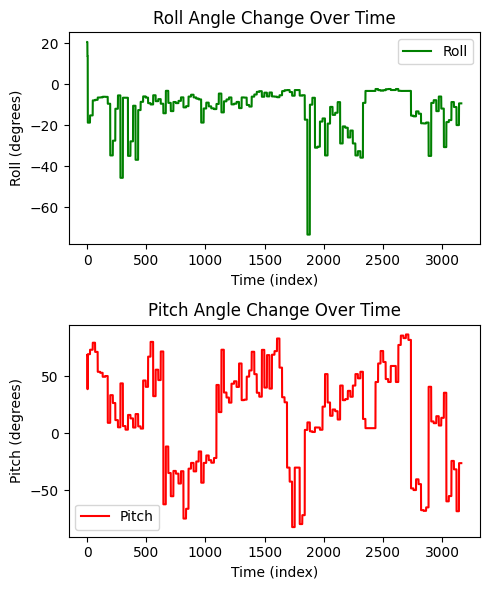

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 6))

# Plot the roll angle change
ax1.plot(df.index, df['roll'], color='green', label='Roll')
ax1.set_title('Roll Angle Change Over Time')
ax1.set_xlabel('Time (index)')
ax1.set_ylabel('Roll (degrees)')
ax1.legend()

# Plot the pitch angle change
ax2.plot(df.index, df['pitch'], color='red', label='Pitch')
ax2.set_title('Pitch Angle Change Over Time')
ax2.set_xlabel('Time (index)')
ax2.set_ylabel('Pitch (degrees)')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## References


*   GIF of a plane rotating. Make a GIF, 6 June 2016, https://i.makeagif.com/media/6-06-2016/MybXwU.gif.
*   "Yaw, Pitch, and Roll: Understanding Rotational Motion." Explanation provided by ChatGPT, OpenAI, 15 Oct. 2024.
*   "MakeCode Wireless Data Logger." micro
, https://microbit.org/projects/make-it-code-it/makecode-wireless-data-logger/. Accessed 15 Oct. 2024.





# 2024 West Houston Institute